In [1]:
import numpy as np
import scipy as sp
from scipy import stats

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [52]:
from ipywidgets import widgets, Layout
from IPython import display

def display_horizon(*args):
    widget_list = list()
    for obj in args:
        widget_temp = widgets.Output()
        with widget_temp:
            display.display(obj)
            widget_list.append(widget_temp)
    return widgets.HBox(widget_list)
   

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [64]:
def plot_dirichlet(alpha, close=True, repeats=2000):
    fig = plt.figure(figsize=(4,5))
    ax = Axes3D(fig)

    x = [1, 0, 0]
    y = [0, 1, 0]
    z = [0, 0, 1]
    verts = [list(zip(x, y, z))]
    ax.add_collection3d(Poly3DCollection(verts, edgecolor="k", lw=2, alpha=0.4))
    ax.text(1, 0, 0, "(1,0,0)", position=(1.1, 0))
    ax.text(0, 1, 0, "(0,1,0)", position=(0, 1.04))
    ax.text(0, 0, 1, "(0,0,1)", position=(-0.2, 0))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.view_init(30, -20)
    tmp_planes = ax.zaxis._PLANES

    # set origin 
    ax.yaxis._PLANES = (
        tmp_planes[2], tmp_planes[3],
        tmp_planes[0], tmp_planes[1],
        tmp_planes[4], tmp_planes[5],
    )
    ax.zaxis._PLANES = (
        tmp_planes[2], tmp_planes[3],
        tmp_planes[0], tmp_planes[1],
        tmp_planes[4], tmp_planes[5],
    )

    alpha = np.array(alpha)
    rv = stats.dirichlet(alpha).rvs
    dirichlet_point = rv(repeats)
    ax.scatter(dirichlet_point[:,0],dirichlet_point[:,1],dirichlet_point[:,2], s=5, alpha=0.1, color='red')
    ax.set_title(f'alpha1: {alpha[0]},  alpha2: {alpha[1]},  alpha3: {alpha[2]}')
    if close == True:
        plt.close()
    
    return fig

In [65]:
alpha_list = [[5,6,4],[2,2,2], [15, 3, 5], [0.4, 3, 2], [0.9, 3,2], [1, 5, 0.5], [1.1, 5, 0.5], [3, 4, 21], [6, 25, 0.4]]

figs = []
for alpha in alpha_list:
    figs.append(plot_dirichlet(alpha))

In [66]:
display_horizon(*figs[:3])

In [67]:
display_horizon(*figs[3:6])

In [68]:
display_horizon(*figs[6:])

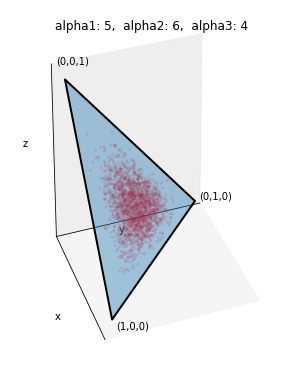

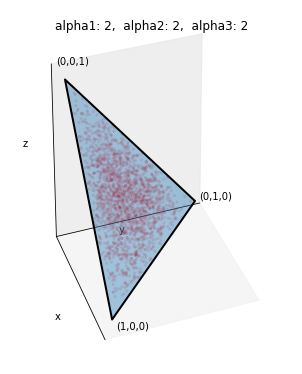

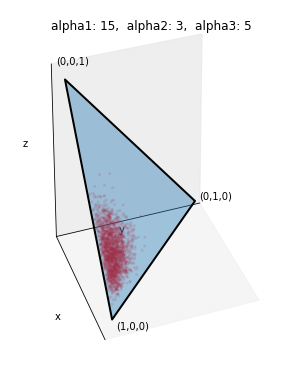

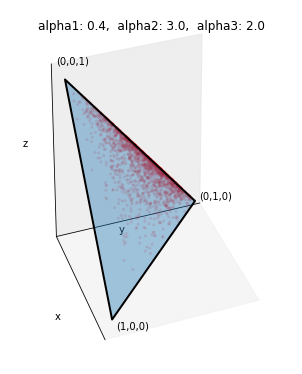

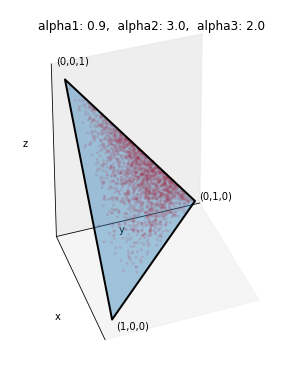

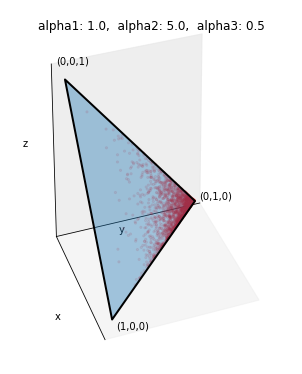

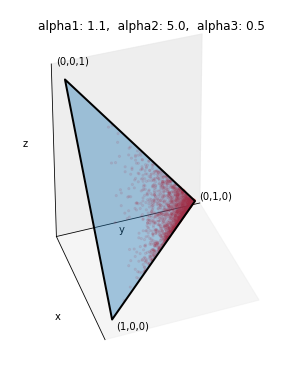

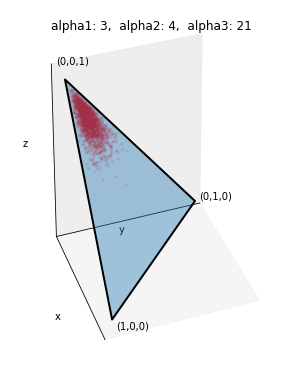

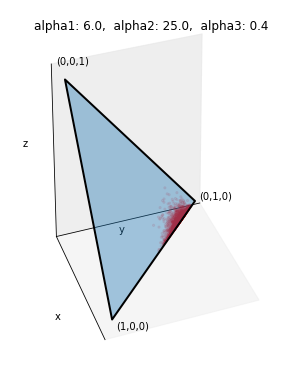

In [69]:
# 깃허브에 시각화 용
for alpha in alpha_list:
    plot_dirichlet(alpha, close=False)